In [141]:
# Import Libraries and Load Data

In [142]:
import pandas as pd
import yfinance as yf
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns

# Load stock data
stock_data = yf.download('META', start='2023-07-19', end='2024-07-18', interval='1d')

# Load news data
news_df = pd.read_csv('/Users/arup/Documents/BAS/News_Data.csv')

[*********************100%%**********************]  1 of 1 completed


In [143]:
stock_data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-07-19,313.029999,318.679993,310.519989,316.010010,315.361969,21763700
2023-07-20,313.500000,315.540009,302.220001,302.519989,301.899597,23836900
2023-07-21,304.570007,305.459991,291.200012,294.260010,293.656555,42089700
2023-07-24,295.779999,297.519989,288.299988,291.609985,291.011963,24915700
2023-07-25,295.190002,298.299988,291.859985,294.470001,293.866119,19585600
...,...,...,...,...,...,...
2024-07-11,530.890015,535.460022,508.369995,512.700012,512.700012,16458300
2024-07-12,497.760010,508.089996,494.230011,498.869995,498.869995,19750500
2024-07-15,498.630005,506.679993,493.369995,496.160004,496.160004,12539200


In [144]:
news_df

,News,Date
0,Daily Digest: Industry News\n Summer Games cou...,7/18/2024 4:26 PM ET
1,Data Dispatch: Earnings & Guidance\n Most S&P ...,7/18/2024 8:54 AM ET
2,The Daily Dose: Industry News\n WBD weighs spl...,7/18/2024 8:03 AM ET
3,Daily Digest: Industry News\n TMT deals lead H...,7/17/2024 4:34 PM ET
4,The Daily Dose: Industry News\n Amazon-Adept A...,7/17/2024 7:51 AM ET
...,...,...
396,The Daily Dose: Industry News\n Musk rebrands ...,7/24/2023 7:57 AM ET
397,The Daily Dose Europe: Industry News\n Microso...,7/24/2023 3:10 AM ET
398,The Daily Dose: Industry News\n Tech giants ag...,7/21/2023 8:06 AM ET
399,The Daily Dose: Industry News\n Netflix adds 5...,7/20/2023 8:05 AM ET


In [145]:
# Prepare Stock Data

In [146]:
# Calculate percentage change
stock_data['Pct_Change'] = stock_data['Close'].pct_change() * 100

# Reset index to get 'Date' as a column
stock_data.reset_index(inplace=True)

# Convert Date to datetime
stock_data['Date'] = pd.to_datetime(stock_data['Date'])

# Filter for significant changes
filtered_stock_df = stock_data[stock_data['Pct_Change'].abs() > 2.5]

filtered_stock_df

,Date,Open,High,Low,Close,Adj Close,Volume,Pct_Change
1,2023-07-20,313.500000,315.540009,302.220001,302.519989,301.899597,23836900,-4.268859
2,2023-07-21,304.570007,305.459991,291.200012,294.260010,293.656555,42089700,-2.730391
6,2023-07-27,325.119995,325.350006,309.839996,311.709991,311.070770,64229200,4.400973
7,2023-07-28,316.880005,326.200012,314.250000,325.480011,324.812531,39220300,4.417574
10,2023-08-02,318.000000,318.390015,310.649994,314.309998,313.665436,20461100,-2.602954
20,2023-08-16,300.200012,301.079987,294.279999,294.290009,293.686493,18547700,-2.536845
21,2023-08-17,293.049988,296.049988,284.950012,285.089996,284.505371,23950100,-3.126172
26,2023-08-24,298.500000,299.459991,286.640015,286.750000,286.161957,18360900,-2.545538
29,2023-08-29,288.579987,299.149994,288.179993,297.989990,297.378906,20844500,2.663123
37,2023-09-11,301.410004,309.040009,301.279999,307.559998,306.929260,19489300,3.246159


In [147]:
# Aggregate News Data by Date

In [148]:
# Convert 'Date' column to datetime and keep only the date part
news_df['Date'] = pd.to_datetime(news_df['Date']).dt.date

# Aggregate news for each date
news_df['News'] = news_df.groupby('Date')['News'].transform(lambda x: ' '.join(x))
news_df = news_df.drop_duplicates(subset='Date').reset_index(drop=True)

/var/folders/lw/mxt4vf712k5_lslhrjcqqj700000gn/T/ipykernel_24089/2996308577.py:2: FutureWarning: Parsed string "7/18/2024 4:26 PM ET" included an un-recognized timezone "ET". Dropping unrecognized timezones is deprecated; in a future version this will raise. Instead pass the string without the timezone, then use .tz_localize to convert to a recognized timezone.
  news_df['Date'] = pd.to_datetime(news_df['Date']).dt.date
/var/folders/lw/mxt4vf712k5_lslhrjcqqj700000gn/T/ipykernel_24089/2996308577.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  news_df['Date'] = pd.to_datetime(news_df['Date']).dt.date
/var/folders/lw/mxt4vf712k5_lslhrjcqqj700000gn/T/ipykernel_24089/2996308577.py:2: FutureWarning: Parsed string "7/18/2024 8:54 AM ET" included an un-recognized timezone "ET". Dropping unrecognized timezones is deprecated; in a future version this wil

In [149]:
news_df

,News,Date
0,Daily Digest: Industry News\n Summer Games cou...,2024-07-18
1,Daily Digest: Industry News\n TMT deals lead H...,2024-07-17
2,Daily Digest: Industry News\n June infotech M&...,2024-07-16
3,News Story: Project Developments\n Avangrid be...,2024-07-15
4,The Daily Dose: Industry News\n AT&T discloses...,2024-07-12
...,...,...
203,The Daily Dose: Industry News\n Verizon adds w...,2023-07-25
204,Data Dispatch: Earnings & Guidance\n S&P 500 e...,2023-07-24
205,The Daily Dose: Industry News\n Tech giants ag...,2023-07-21
206,The Daily Dose: Industry News\n Netflix adds 5...,2023-07-20


In [150]:
# Sentiment Analysis with VADER

In [151]:
# Initialize sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Function to get sentiment score
def get_sentiment_score(text):
    if pd.isna(text) or text.strip() == '':
        return 0
    return analyzer.polarity_scores(text)['compound']

# Apply sentiment analysis
news_df['Sentiment Score'] = news_df['News'].apply(get_sentiment_score)

news_df

,News,Date,Sentiment Score
0,Daily Digest: Industry News\n Summer Games cou...,2024-07-18,0.9426
1,Daily Digest: Industry News\n TMT deals lead H...,2024-07-17,-0.2732
2,Daily Digest: Industry News\n June infotech M&...,2024-07-16,0.9442
3,News Story: Project Developments\n Avangrid be...,2024-07-15,0.4939
4,The Daily Dose: Industry News\n AT&T discloses...,2024-07-12,0.0000
...,...,...,...
203,The Daily Dose: Industry News\n Verizon adds w...,2023-07-25,0.0000
204,Data Dispatch: Earnings & Guidance\n S&P 500 e...,2023-07-24,-0.2461
205,The Daily Dose: Industry News\n Tech giants ag...,2023-07-21,0.5994
206,The Daily Dose: Industry News\n Netflix adds 5...,2023-07-20,0.0000


In [152]:
# Merge Stock and News Data

In [153]:
# Convert 'Date' in stock data to only date part
filtered_stock_df['Date'] = filtered_stock_df['Date'].dt.date

# Merge stock and news data on Date
merged_df = pd.merge(filtered_stock_df, news_df, on='Date', how='left')

merged_df

/var/folders/lw/mxt4vf712k5_lslhrjcqqj700000gn/T/ipykernel_24089/3844273156.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_stock_df['Date'] = filtered_stock_df['Date'].dt.date


,Date,Open,High,Low,Close,Adj Close,Volume,Pct_Change,News,Sentiment Score
0,2023-07-20,313.500000,315.540009,302.220001,302.519989,301.899597,23836900,-4.268859,The Daily Dose: Industry News\n Netflix adds 5...,0.0000
1,2023-07-21,304.570007,305.459991,291.200012,294.260010,293.656555,42089700,-2.730391,The Daily Dose: Industry News\n Tech giants ag...,0.5994
2,2023-07-27,325.119995,325.350006,309.839996,311.709991,311.070770,64229200,4.400973,Daily Digest: Industry News\n Microsoft faces ...,0.4404
3,2023-07-28,316.880005,326.200012,314.250000,325.480011,324.812531,39220300,4.417574,The Daily Dose: Industry News\n T-Mobile's cus...,0.0772
4,2023-08-02,318.000000,318.390015,310.649994,314.309998,313.665436,20461100,-2.602954,The Daily Dose Europe: Industry News\n Meta to...,0.4019
5,2023-08-16,300.200012,301.079987,294.279999,294.290009,293.686493,18547700,-2.536845,Consumer Insights: Consumer Insights\n Consume...,0.4215
6,2023-08-17,293.049988,296.049988,284.950012,285.089996,284.505371,23950100,-3.126172,NaN,NaN
7,2023-08-24,298.500000,299.459991,286.640015,286.750000,286.161957,18360900,-2.545538,Data Dispatch: Industry News\n Live Nation rep...,-0.1697
8,2023-08-29,288.579987,299.149994,288.179993,297.989990,297.378906,20844500,2.663123,The Daily Dose: Industry News\n Google to unve...,0.2960
9,2023-09-11,301.410004,309.040009,301.279999,307.559998,306.929260,19489300,3.246159,Technology: Technology\n Survey: Consumers exp...,0.7650


In [154]:
# Plotting and Correlation Analysis:

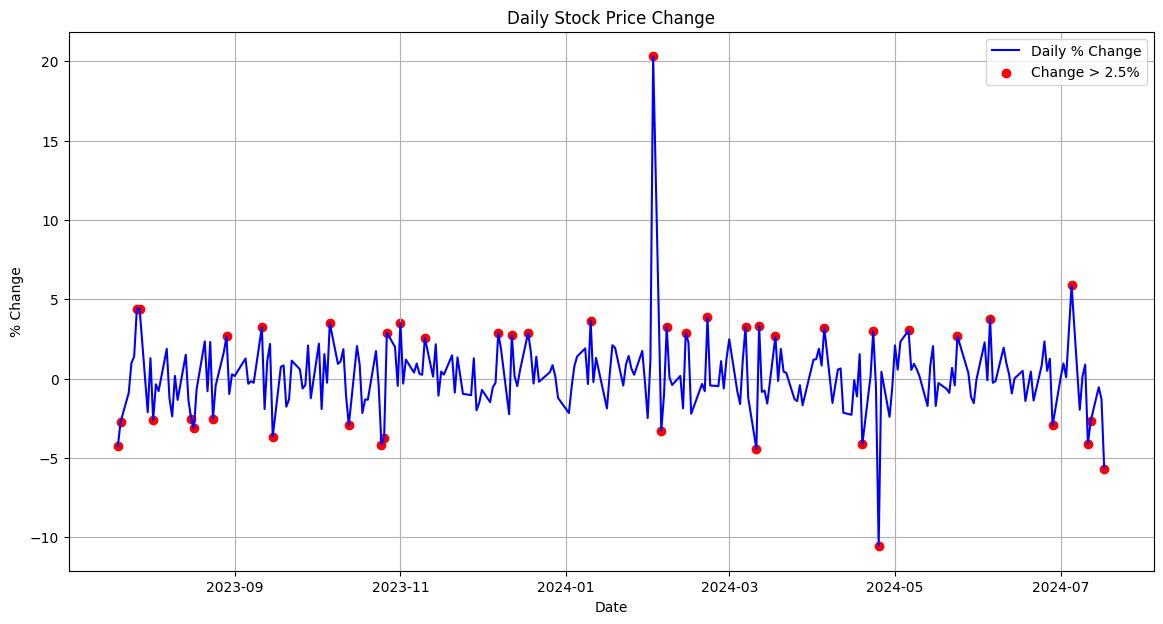

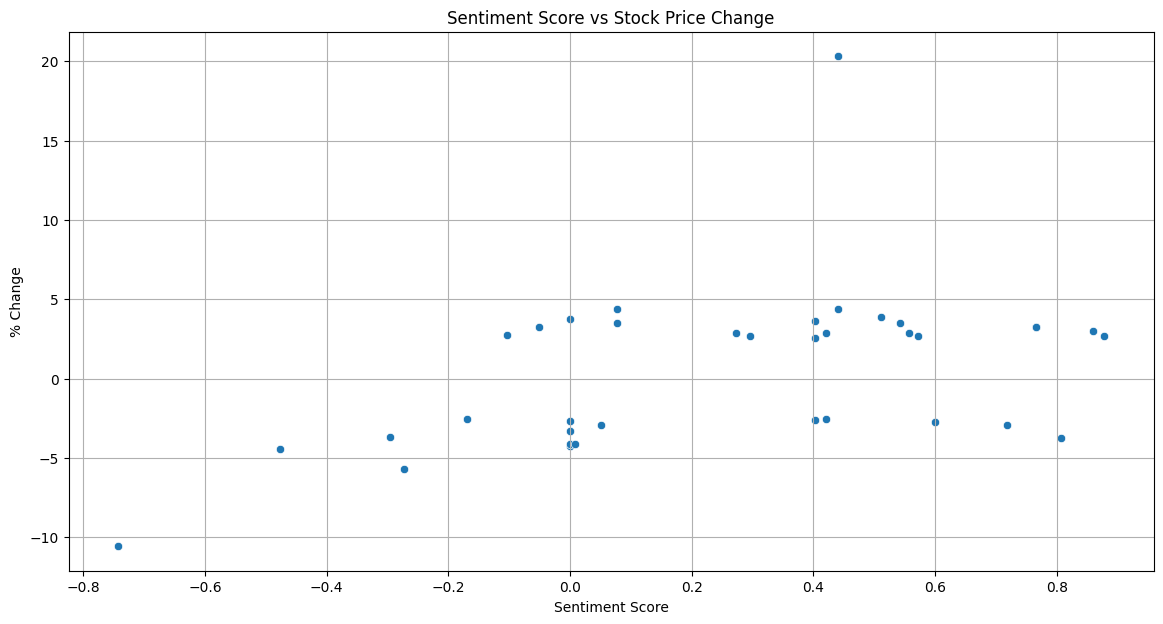

Correlation between sentiment score and stock price change: 0.46


In [155]:
# Plot stock price change with significant changes marked
plt.figure(figsize=(14, 7))
plt.plot(stock_data['Date'], stock_data['Pct_Change'], label='Daily % Change', color='blue')
plt.scatter(filtered_stock_df['Date'], filtered_stock_df['Pct_Change'], color='red', label='Change > 2.5%')
plt.xlabel('Date')
plt.ylabel('% Change')
plt.title('Daily Stock Price Change')
plt.legend()
plt.grid(True)
plt.show()

# Plot sentiment scores and stock price change
plt.figure(figsize=(14, 7))
sns.scatterplot(x=merged_df['Sentiment Score'], y=merged_df['Pct_Change'])
plt.xlabel('Sentiment Score')
plt.ylabel('% Change')
plt.title('Sentiment Score vs Stock Price Change')
plt.grid(True)
plt.show()

# Correlation Analysis
correlation = merged_df[['Sentiment Score', 'Pct_Change']].corr().iloc[0, 1]
print(f'Correlation between sentiment score and stock price change: {correlation:.2f}')